# Comp6481 / 8481 coursework 2024 

We will be working with data from https://www.kaggle.com/datasets/sethpoly/application-rejection-emails 

*Detect Reject Emails* by SethPoly@kaggle


# Part A

This notebook contains the questions for Part A of the practical coursework. 

Please ensure that this notebook is stored in a folder which also has the `Rejection Data - Sheet1.csv` data file

When you answer these questions, include in your submission for Part A your answers and the code that you used. 

The most straightforward way to do this is to complete Part A within this Jupyter notebook. *Please add your answers and code per question in the indicated cells.*

You can instead submit a separate python file for Part A if this is preferable for you, but remember to include:
* your code 
* comments that: 
 * clearly indicate which question each code snippet relates to, 
 * contain the answer to that question.

Part A is worth 20 marks in total. Each question is annotated with the number of marks that question is worth. In each question, half the marks are awarded for the code and half the marks are awarded for correct answers to the question.

***Cells are provided for you to complete your answers in this notebook. Please do not edit any of the existing code and markdown already provided in this Jupyter notebook.***

You are welcome to extend this notebook also for your Part B work, though you could also use a different notebook or python file. Please add any working for Part B at the end of this notebook if you wish to use this notebook for Part B work too.


**************************************************************************************
* Start of code adapted from https://www.kaggle.com/code/sethpoly/detect-reject-emails
* The majority of code extracted from the original notebook is commented out below, but included for completeness
**************************************************************************************

# Detect Reject emails

Author: Sethpoly@kaggle

Link: https://www.kaggle.com/code/sethpoly/detect-reject-emails

## Used to detect the rejection emails from jobs applied to.


In [437]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv).
from gensim.models import Word2Vec
import nltk

df = pd.read_csv('Rejection Data - Sheet1.csv')
df.tail()

,Email,Status
124,"Starting March 17, 2021, eBay will no longer ...",not_reject
125,"Hi Seth,\n\nI want to make finding a great rem...",not_reject
126,"Hello Seth,\n\nI just wanted to take a second ...",not_reject
127,Your free YouMail plan includes 20 in-app tran...,not_reject
128,\nSupport resources for developers at all leve...,not_reject


In [438]:
import string
import matplotlib.pyplot as plt
import nltk


# For the purposes of this assessment, all text processing actions in this cell have been removed except the replacement of newline characters by space characters

# convert email text to lowercase
#df.Email = df.Email.apply(lambda x: x.lower())
# remove punctuation
#df.Email = df.Email.apply(lambda x: x.translate(str.maketrans('','', string.punctuation)))
# remove numbers
#df.Email = df.Email.apply(lambda x: x.translate(str.maketrans('','','1234567890')))
# remove newline tags
df.Email = df.Email.apply(lambda x: x.translate(str.maketrans('\n',' ')))
df.tail()



,Email,Status
124,"Starting March 17, 2021, eBay will no longer ...",not_reject
125,"Hi Seth, I want to make finding a great remot...",not_reject
126,"Hello Seth, I just wanted to take a second to...",not_reject
127,Your free YouMail plan includes 20 in-app tran...,not_reject
128,Support resources for developers at all level...,not_reject


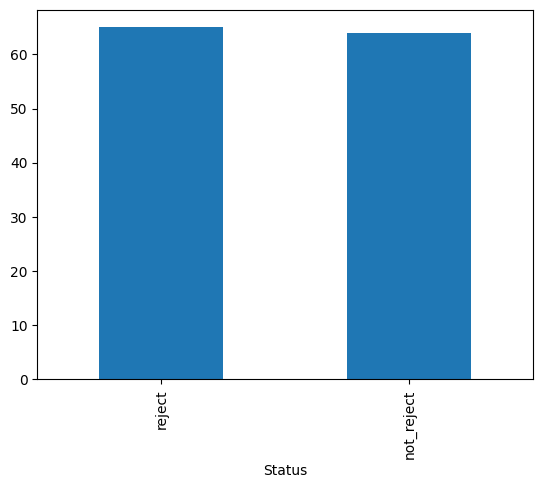

In [439]:
df.Status.value_counts().plot(kind='bar')
plt.show()

In [440]:
# Add a column 'Tokens' to df, to hold the email contents as a list of tokens
df['Tokens'] = [nltk.word_tokenize(e) for e in df.Email]

print(df.Tokens[0])

['Thank', 'you', 'for', 'applying', 'to', 'the', 'Junior', 'Software', 'Developer', 'position', 'at', 'MSC', 'Technology', '.', 'Unfortunately', ',', 'MSC', 'Technology', 'has', 'moved', 'to', 'the', 'next', 'step', 'in', 'their', 'hiring', 'process', ',', 'and', 'your', 'application', 'was', 'not', 'selected', 'at', 'this', 'time', '.']


In [441]:
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
#from sklearn.preprocessing import LabelEncoder
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import confusion_matrix
#from sklearn.model_selection import cross_val_score
#from sklearn.metrics import classification_report

# pull data into vectors to create collection of text/tokens
#vectorizer = CountVectorizer()
#x = vectorizer.fit_transform(df.Email)

#encoder = LabelEncoder()
#y = encoder.fit_transform(df.Status)

# split into train and test sets
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Shape of sets
#print(x_train.shape)
#print(y_train.shape)
#print(x_test.shape)
#print(y_test.shape)

In [442]:
#%%time
#nb = MultinomialNB()
#nb.fit(x_train, y_train)

In [443]:
#def predict_reject(email):
#    category_names = {'reject':'reject','not_reject':'not-reject'}
#    cod = nb.predict(vectorizer.transform([email]))
#    return category_names[encoder.inverse_transform(cod)[0]]

#print(predict_reject('Unfortunately we will not be moving forward'))
#print(predict_reject('I found some job listings you may be interested in'))
#print(predict_reject('We were very fortunate to have a strong group of applicants to consider for this role and have recently filled this position. Unfortunately, because this role is no longer available, we will not be moving forward with your application.'))
#print(predict_reject(''))


In [444]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.multiclass import OneVsRestClassifier

# Init the classfifier
#clf = OneVsRestClassifier(LogisticRegression())

# Fit classifier to training data
#clf.fit(x_train, y_train)

# Print accuracy
#print(f'Accuracy: {clf.score(x_test, y_test)}')

In [445]:
#x_test_clv_pred = clf.predict(x_test)
#confusion_matrix(y_test, x_test_clv_pred)
#print(classification_report(y_test, x_test_clv_pred, target_names=encoder.classes_))

 - Inspiration and code samples from https://towardsdatascience.com/i-built-a-reject-not-reject-email-classifier-for-my-job-applications-844a3b6cd67e

**************************************************************************************
* End of code adapted from https://www.kaggle.com/code/sethpoly/detect-reject-emails
**************************************************************************************

# Coursework questions for Part A:

For each question, please add your code to the empty code cell below the question, and please add any written answers/comments to the empty markdown cell below the question, as indicated. 

***You are allowed to add additional code markdown cells as needed below this point. Please do not edit any of the existing code and markdown already provided in this Jupyter notebook.***


## Q1 [2 marks]

Add a column to the `df` data frame named `Length`, which holds the number of tokens in the tokenised list representing that email (i.e. the number of items in the list in `df.Tokens` for each row)

In [446]:
# Added a new dataframe called Length
df['Length'] = df['Tokens'].apply(len)
# print(df)

In [447]:
#Do not edit this cell, except that you can uncomment the line below for testing your answer to this question
print(df['Length'])

0       39
1       47
2      139
3       49
4       81
      ... 
124    133
125     87
126     58
127     34
128    146
Name: Length, Length: 129, dtype: int64


## Q2. 

### Q2a [2 marks] 

Choose an appropriate visualisation to create a visualisation of the Length and Status data in `df`, after you have completed Q1.

You can consult the lectures on visualisation and also use the following docs to help guide you and give you inspiration:

https://matplotlib.org/stable/plot_types/basic/index.html
https://realpython.com/pandas-plot-python/
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
https://www.w3schools.com/python/matplotlib_intro.asp

### Q2b [2 marks] 

Give a brief comment in the markdown box below about why you have chosen the visualisation you did, with reference to the type of data you are visualising.

Add a comment answering the question: "Do you see any patterns in your visualisation of the data frame data on email Length and email Status?"

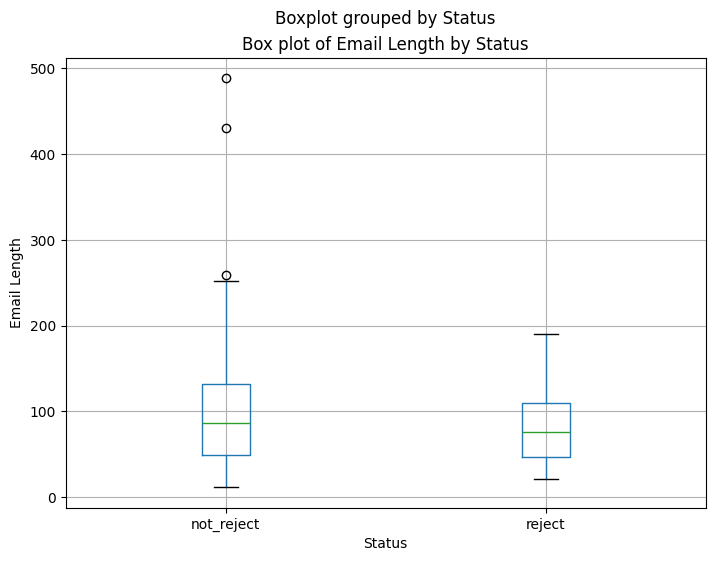

In [448]:
df.boxplot(column='Length', by='Status', figsize=(8, 6))
plt.title('Box plot of Email Length by Status')
plt.xlabel('Status')
plt.ylabel('Email Length')
plt.show()

Write your answer to Q2b here:




**Answer 2B:**

An email is a form of quantitative data as we can measure how long or short the data is. This is different to the status which is a categorical (Binary Categorical)  form of data as it can either be accepted or rejected. A Box plot graph is the most appropriate visualisation method for this data. This method allows us to see the email length compared to the status, however, it also gives us more detail as we can spot any outliers which are extreme values that can significantly impact the analysis. This can particularly be spotted in the not_reject category where there are a few outliers compared to the rejects which don't have any outliers. The box plot also allows us to compare the distribution of email lengths for reject and not_reject categories side by side. This comparison is important for understanding how email lengths vary across different statuses. In this graph we can also see that the not_reject emails have a bigger difference between the minimum and maximum values compared to the reject email.This visualisation also allows us to spot the interquartile range. In this graph, we can see that not_reject's interquartile range is slightly larger compared to the reject emails showing that the not_reject emails are more personalised.

## Q3. [4 marks] 

We have defined a measure of `lexical richness` as: the number of unique tokens in a text, divided by the total number of tokens in that text. 

[We have also defined a second measure: how many times, on average, is each token used in the text? We will *not* use that measure here.]

Add a column to the data frame `df` named `LexRich`, which calculates the lexical richness for each email in the dataset.



In [449]:
# Answer for Q3
def calculate_lexical_richness(tokens):
    tokens = [token.lower() for token in tokens]
    unique_tokens = set(tokens)
    total_tokens = len(tokens)   
    if total_tokens != 0:      
        # Formula for the lexical richness  
        return len(unique_tokens) / total_tokens 
    else:
        # Avoid dividing by zero and just return 0
        return 0

df['LexRich'] = df['Tokens'].apply(calculate_lexical_richness)

In [450]:
#Do not edit this cell, except that you can uncomment the line below for testing your answer to this question
print(df['LexRich'])

0      0.820513
1      0.765957
2      0.640288
3      0.673469
4      0.666667
         ...   
124    0.533835
125    0.724138
126    0.758621
127    0.794118
128    0.684932
Name: LexRich, Length: 129, dtype: float64


## Q4. 

For Q4a and Q4b, note that we can access all the data in df with the Status = 'reject', using this code:

print(df[df.Status=='reject'])

###  Q4a: [4 marks] 

Calculate two variables, `lex_reject` and `lex_not_reject`
* `lex_reject' = the mean lexical richness for the `reject' emails
* `lex_not_reject' = the mean lexical richness for the `not_reject' emails

###  Q4b: [2 marks] 
Comment briefly on the difference: what does this tell us about how the variety of vocabulary use differs between reject emails and not_reject emails? [approx 2-4 sentences]

In [451]:
# We can access all the data in df with the Status = 'reject', using this code:
# print(df[df.Status=='reject'])

In [452]:
# Answer for Q4a
# Filter for reject and not reject statuses
reject_emails = df[df.Status == 'reject']
not_reject_emails = df[df.Status != 'reject']
# Calculate the mean lexical richness for the 'reject' emails
lex_reject = reject_emails['LexRich'].mean()
# Calculate the mean lexical richness for the 'not_reject' emails
lex_not_reject = not_reject_emails['LexRich'].mean()


In [453]:
#Do not edit this cell, except that you can uncomment the line below for testing your answer to this question
print(lex_reject)
print(lex_not_reject)

0.7115720169244959
0.7039732336736371


Write your answer for Q4b here:



**Answer 4B:**

The mean lexical richness for reject emails is approximately 0.7116, while for ‘not_reject’ emails, it’s around 0.7040. Lex_reject emails have a greater variety of vocabulary. At first, this suggests that they use a wider range of words and expressions. Whereas, lex_not_reject emails may have a more limited vocabulary.
however, Lex_reject emails tend to be shorter on average. This could contribute to their higher lexical variety. Longer emails (like lex_not_reject) might repeat certain words or phrases, leading to less lexical diversity. Stopwords are common words (e.g., “the,” “and,” “is”) that don’t carry significant meaning. Lex_reject emails likely use fewer stopwords, which can improve its lexical richness.
Longer emails could potentially include more stopwords like in the lex_not_reject.

## Q5. [4 marks]

Train a Word2Vec model called `model` using the following input parameters:
* `sentences` as the data in `df.Tokens`
* a `vector_size` of 100
* a `window` of 5
* a `min_count` of 1
* a `workers` of 4

Using your Word2Vec `model`, list the top 20 most similar tokens to the token `developer`.

In [454]:
# Answer to Q5 
# train the model with the following parameters:`sentences` as the data in `df.Tokens`, `vector_size` of 100, `window` of 5, `min_count` of 1,`workers` of 4
model = Word2Vec(sentences=df.Tokens, vector_size=100, window=5, min_count=1, workers=4)
# Get the top 20 most similar words to 'developer'
similar_tokens = model.wv.most_similar('developer', topn=20)
# Print all the tokens
print(similar_tokens)

[('1', 0.9167288541793823), ('want', 0.913592517375946), ('move', 0.9122779369354248), ('visit', 0.9113736152648926), ('reviewed', 0.9111210703849792), ('any', 0.910977840423584), ('ago', 0.9106885194778442), ('been', 0.9106764793395996), ('but', 0.9103994369506836), ('clients', 0.910388171672821), ('what', 0.9102762341499329), ('consider', 0.9101133942604065), ('experience', 0.909894585609436), ('also', 0.9097738862037659), ('one', 0.9097634553909302), ('position', 0.9097541570663452), ('success', 0.9096437096595764), ('how', 0.9096171259880066), ('fit', 0.9095920324325562), ('interest', 0.9095802307128906)]


In [455]:
# More for easier formatting
for i in similar_tokens:
    print(i)

('1', 0.9167288541793823)
('want', 0.913592517375946)
('move', 0.9122779369354248)
('visit', 0.9113736152648926)
('reviewed', 0.9111210703849792)
('any', 0.910977840423584)
('ago', 0.9106885194778442)
('been', 0.9106764793395996)
('but', 0.9103994369506836)
('clients', 0.910388171672821)
('what', 0.9102762341499329)
('consider', 0.9101133942604065)
('experience', 0.909894585609436)
('also', 0.9097738862037659)
('one', 0.9097634553909302)
('position', 0.9097541570663452)
('success', 0.9096437096595764)
('how', 0.9096171259880066)
('fit', 0.9095920324325562)
('interest', 0.9095802307128906)


# End of Part A

If you wish to use this notebook for any code or calculations for Part B, please do so by adding cells below here.

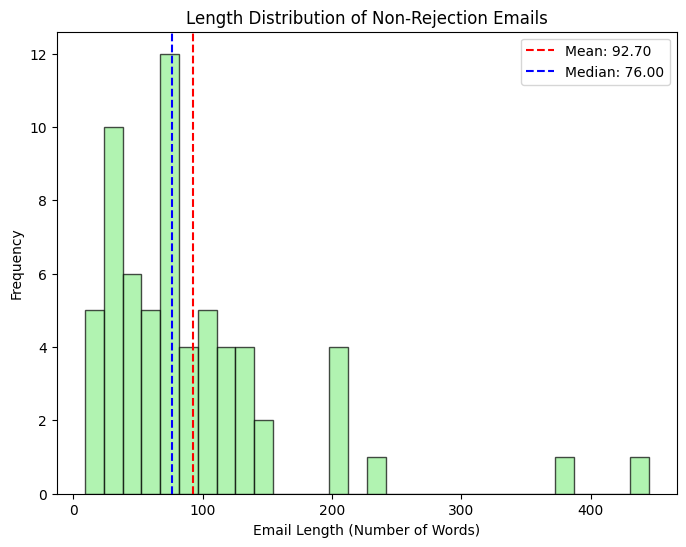

Mean email length: 92.70 words
Median email length: 76.00 words
Standard deviation: 77.14


In [456]:
email_lengths = [len(email.split()) for email in df[df['Status'] != 'reject']['Email']]

mean_length = np.mean(email_lengths)
median_length = np.median(email_lengths)
std_dev = np.std(email_lengths)

plt.figure(figsize=(8, 6))
plt.hist(email_lengths, bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Length Distribution of Non-Rejection Emails')
plt.xlabel('Email Length (Number of Words)')
plt.ylabel('Frequency')
plt.axvline(mean_length, color='red', linestyle='--', label=f'Mean: {mean_length:.2f}')
plt.axvline(median_length, color='blue', linestyle='--', label=f'Median: {median_length:.2f}')
plt.legend()
plt.show()

print(f'Mean email length: {mean_length:.2f} words')
print(f'Median email length: {median_length:.2f} words')
print(f'Standard deviation: {std_dev:.2f}')


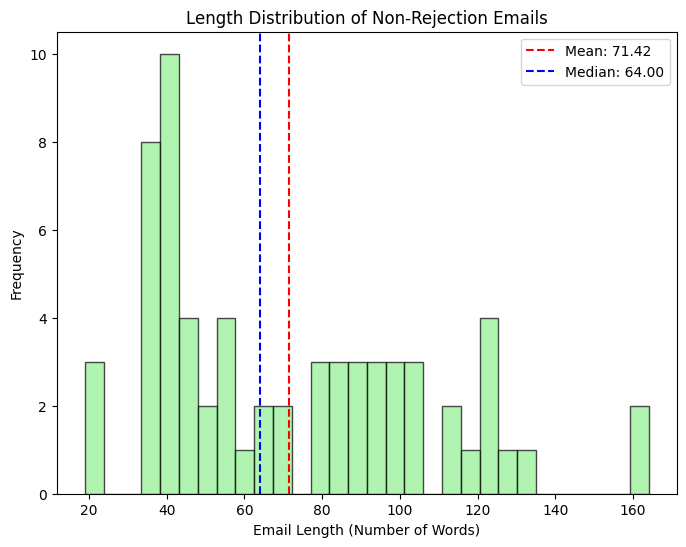

Mean email length: 71.42 words
Median email length: 64.00 words
Standard deviation: 35.19


In [457]:
email_lengths = [len(email.split()) for email in df[df['Status'] == 'reject']['Email']]

mean_length = np.mean(email_lengths)
median_length = np.median(email_lengths)
std_dev = np.std(email_lengths)

plt.figure(figsize=(8, 6))
plt.hist(email_lengths, bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Length Distribution of Non-Rejection Emails')
plt.xlabel('Email Length (Number of Words)')
plt.ylabel('Frequency')
plt.axvline(mean_length, color='red', linestyle='--', label=f'Mean: {mean_length:.2f}')
plt.axvline(median_length, color='blue', linestyle='--', label=f'Median: {median_length:.2f}')
plt.legend()
plt.show()

print(f'Mean email length: {mean_length:.2f} words')
print(f'Median email length: {median_length:.2f} words')
print(f'Standard deviation: {std_dev:.2f}')

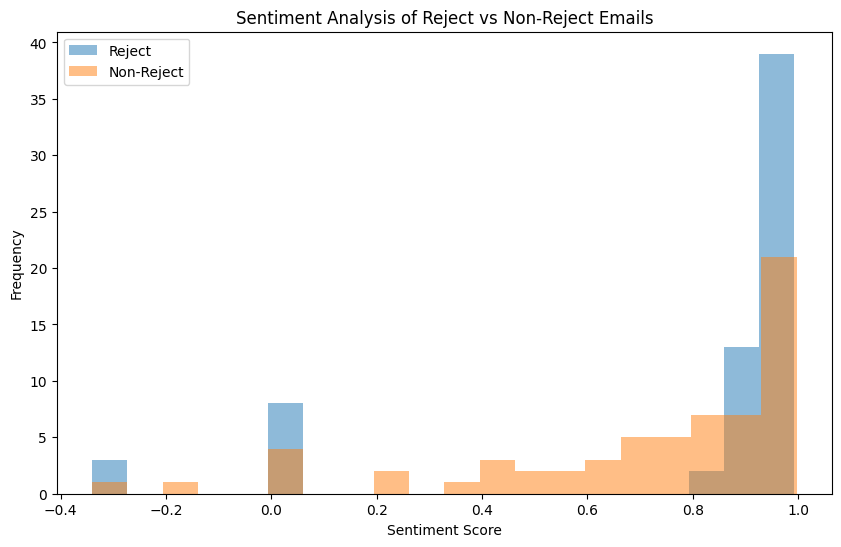

In [458]:
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

reject_emails = df[df['Status'] == 'reject']['Email']
not_reject_emails = df[df['Status'] != 'reject']['Email']

reject_tokens = [token for email in reject_emails for token in email]
not_reject_tokens = [token for email in not_reject_emails for token in email]

stop_words = set(stopwords.words('english'))
reject_tokens = [token for token in reject_tokens if token.lower() not in stop_words]
not_reject_tokens = [token for token in not_reject_tokens if token.lower() not in stop_words]

vader_analyzer = SentimentIntensityAnalyzer()

reject_sentiments = [vader_analyzer.polarity_scores(email)['compound'] for email in reject_emails]

not_reject_sentiments = [vader_analyzer.polarity_scores(email)['compound'] for email in not_reject_emails]

plt.figure(figsize=(10, 6))
plt.hist(reject_sentiments, bins=20, alpha=0.5, label='Reject')
plt.hist(not_reject_sentiments, bins=20, alpha=0.5, label='Non-Reject')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis of Reject vs Non-Reject Emails')
plt.legend()
plt.show()


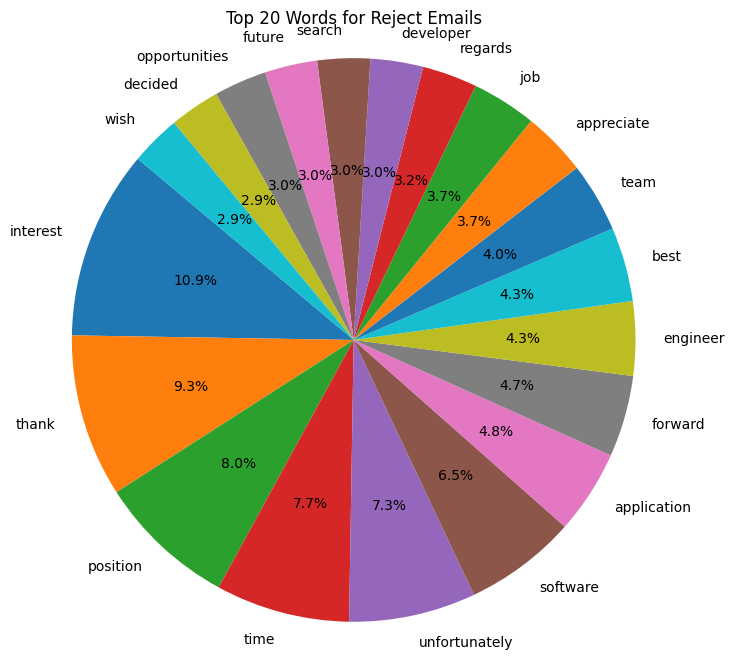

In [459]:
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import pandas as pd

stop_words = set(stopwords.words('english'))

reject_emails = df[df['Status'] == 'reject']['Email']

reject_words = []

for email in reject_emails:
    words = word_tokenize(email)
    words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]
    reject_words.extend(words)

reject_freq_dist = FreqDist(reject_words)

top_reject_words = reject_freq_dist.most_common(20)

labels = [word for word, freq in top_reject_words]
sizes = [freq for word, freq in top_reject_words]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 

plt.title('Top 20 Words for Reject Emails')

plt.show()


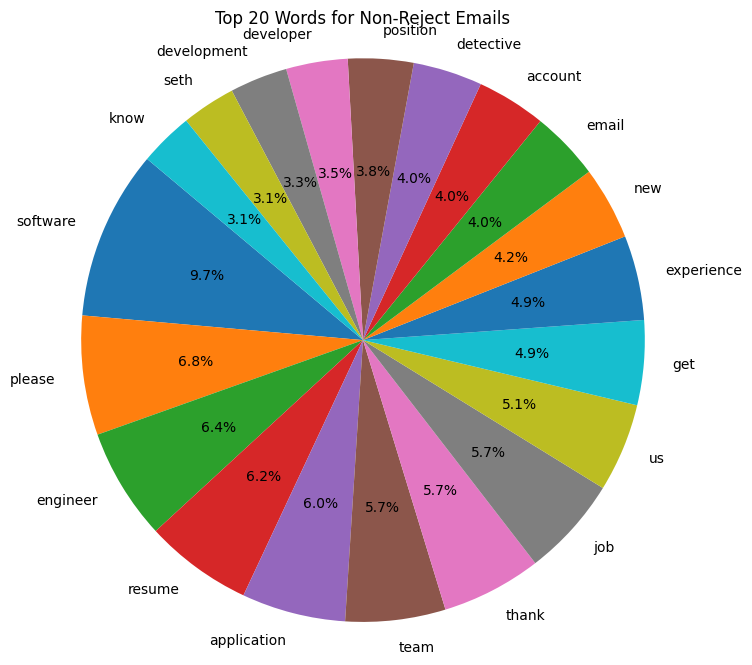

In [460]:
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import pandas as pd

stop_words = set(stopwords.words('english'))

non_reject_emails = df[df['Status'] != 'reject']['Email']

non_reject_words = []

for email in non_reject_emails:
    words = word_tokenize(email)
    words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]
    non_reject_words.extend(words)

non_reject_freq_dist = FreqDist(non_reject_words)

top_non_reject_words = non_reject_freq_dist.most_common(20)

labels = [word for word, freq in top_non_reject_words]
sizes = [freq for word, freq in top_non_reject_words]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  

plt.title('Top 20 Words for Non-Reject Emails')

plt.show()


In [461]:
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

non_reject_emails = df[df['Status'] != 'reject']['Email']

non_reject_words = []

for email in non_reject_emails:
    words = word_tokenize(email)
    words = [word.lower() for word in words if word.lower() not in stop_words]
    non_reject_words.extend(words)


non_reject_freq_dist = FreqDist(non_reject_words)

top_non_reject_words = non_reject_freq_dist.most_common(30)

print("\nTop 20 words for non-reject emails:")
for word, freq in top_non_reject_words:
    print(f"{word}: {freq}")


Top 20 words for non-reject emails:
.: 275
,: 264
:: 57
-: 46
software: 44
!: 42
please: 31
engineer: 29
resume: 28
application: 27
(: 27
): 27
team: 26
thank: 26
job: 26
us: 23
get: 22
experience: 22
*: 21
%: 20
new: 19
email: 18
account: 18
detective: 18
position: 17
developer: 16
’: 16
?: 15
development: 15
seth: 14


In [462]:
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

reject_emails = df[df['Status'] == 'reject']['Email']

reject_words = []

for email in reject_emails:
    words = word_tokenize(email)
    words = [word.lower() for word in words if word.lower() not in stop_words]
    reject_words.extend(words)

reject_freq_dist = FreqDist(reject_words)

top_reject_words = reject_freq_dist.most_common(30)

print("Top words for reject emails:")
for word, freq in top_reject_words:
    print(f"{word}: {freq}")


Top words for reject emails:
.: 236
,: 230
interest: 79
thank: 68
position: 58
time: 56
unfortunately: 53
software: 47
application: 35
forward: 34
engineer: 31
best: 31
team: 29
appreciate: 27
job: 27
regards: 23
developer: 22
search: 22
future: 22
opportunities: 22
decided: 21
wish: 21
career: 19
please: 19
new: 19
move: 18
role: 18
applying: 17
moving: 17
’: 17


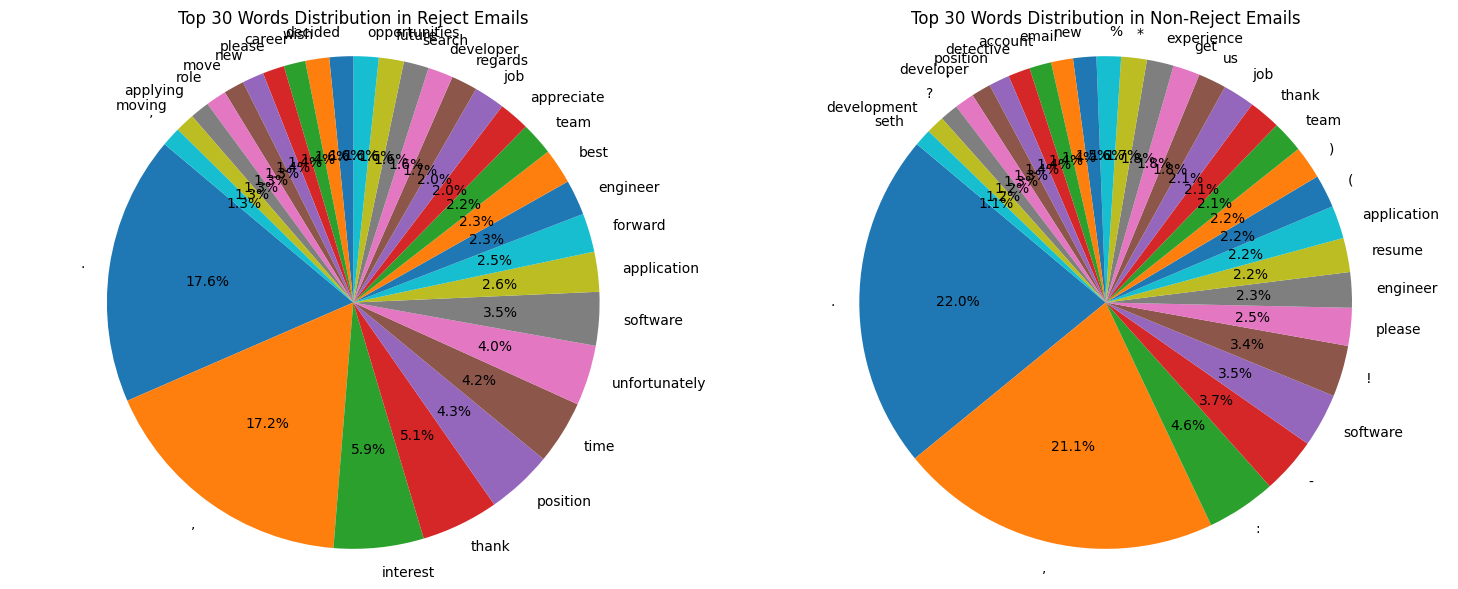

In [463]:
import matplotlib.pyplot as plt

top_reject_words = reject_freq_dist.most_common(30)
reject_words, reject_frequencies = zip(*top_reject_words)

top_non_reject_words = non_reject_freq_dist.most_common(30)
non_reject_words, non_reject_frequencies = zip(*top_non_reject_words)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].pie(reject_frequencies, labels=reject_words, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Top 30 Words Distribution in Reject Emails')
axes[0].axis('equal') 

axes[1].pie(non_reject_frequencies, labels=non_reject_words, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Top 30 Words Distribution in Non-Reject Emails')
axes[1].axis('equal')  

plt.tight_layout()
plt.show()


In [464]:
from nltk.sentiment import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

reject_sentiment = [sid.polarity_scores(email)['compound'] for email in reject_emails]
avg_reject_sentiment = sum(reject_sentiment) / len(reject_sentiment)

not_reject_sentiment = [sid.polarity_scores(email)['compound'] for email in not_reject_emails]
avg_not_reject_sentiment = sum(not_reject_sentiment) / len(not_reject_sentiment)

print("Average sentiment for rejection emails:", avg_reject_sentiment)
print("Average sentiment for non-rejection emails:", avg_not_reject_sentiment)


Average sentiment for rejection emails: 0.7723276923076925
Average sentiment for non-rejection emails: 0.7124093749999998


In [465]:
english_stopwords = set(nltk.corpus.stopwords.words('english'))

reject_total_tokens_before = sum(len(email.split()) for email in reject_emails)

reject_tokens_after_stopwords = []

for email in reject_emails:
    words = email.split()
    filtered_words = [word for word in words if word.lower() not in english_stopwords]
    reject_tokens_after_stopwords.extend(filtered_words)

reject_total_tokens_after = len(reject_tokens_after_stopwords)

print("Total tokens in reject emails before removing stopwords:", reject_total_tokens_before)
print("Total tokens in reject emails after removing stopwords:", reject_total_tokens_after)


Total tokens in reject emails before removing stopwords: 4642
Total tokens in reject emails after removing stopwords: 2485


In [466]:
english_stopwords = set(nltk.corpus.stopwords.words('english'))
non_reject_total_tokens_before = sum(len(email.split()) for email in non_reject_emails)

non_reject_tokens_after_stopwords = []

for email in non_reject_emails:
    words = email.split()
    filtered_words = [word for word in words if word.lower() not in english_stopwords]
    non_reject_tokens_after_stopwords.extend(filtered_words)

non_reject_total_tokens_after = len(non_reject_tokens_after_stopwords)

print("Total tokens in non-reject emails before removing stopwords:", non_reject_total_tokens_before)
print("Total tokens in non-reject emails after removing stopwords:", non_reject_total_tokens_after)


Total tokens in non-reject emails before removing stopwords: 5933
Total tokens in non-reject emails after removing stopwords: 3528


In [467]:
from nltk.tokenize import word_tokenize
from collections import Counter

reject_emails = df[df['Status'] == 'reject']['Email']
non_reject_emails = df[df['Status'] != 'reject']['Email']

reject_unique_tokens = Counter()
non_reject_unique_tokens = Counter()

for email in reject_emails:
    words = word_tokenize(email)
    reject_unique_tokens.update(set(words))

for email in non_reject_emails:
    words = word_tokenize(email)
    non_reject_unique_tokens.update(set(words))

# Print results
print("Token count for reject emails before lowercasing:", sum(reject_unique_tokens.values()))
print("Token count for non-reject emails before lowercasing:", sum(non_reject_unique_tokens.values()))


Token count for reject emails before lowercasing: 3613
Token count for non-reject emails before lowercasing: 4451


In [468]:
from nltk.tokenize import word_tokenize
from collections import Counter

reject_emails = df[df['Status'] == 'reject']['Email']
non_reject_emails = df[df['Status'] != 'reject']['Email']

reject_unique_tokens = Counter()
non_reject_unique_tokens = Counter()

for email in reject_emails:
    words = word_tokenize(email.lower())
    reject_unique_tokens.update(set(words))

for email in non_reject_emails:
    words = word_tokenize(email.lower())
    non_reject_unique_tokens.update(set(words))

print("Token count for reject emails after lowercasing:", sum(reject_unique_tokens.values()))
print("Token count for non-reject emails after lowercasing:", sum(non_reject_unique_tokens.values()))


Token count for reject emails after lowercasing: 3541
Token count for non-reject emails after lowercasing: 4264


In [469]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

def display_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

reject_df = df[df['Status'] == 'reject']
reject_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
reject_dtm = reject_vectorizer.fit_transform(reject_df['Email'])
reject_feature_names = reject_vectorizer.get_feature_names_out()

reject_lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
reject_lda_model.fit(reject_dtm)

print("Topics for reject emails:")
display_topics(reject_lda_model, reject_feature_names, n_top_words=10)

non_reject_df = df[df['Status'] != 'reject']
non_reject_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
non_reject_dtm = non_reject_vectorizer.fit_transform(non_reject_df['Email'])
non_reject_feature_names = non_reject_vectorizer.get_feature_names_out()

non_reject_lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
non_reject_lda_model.fit(non_reject_dtm)

print("\nTopics for non-reject emails:")
display_topics(non_reject_lda_model, non_reject_feature_names, n_top_words=10)


Topics for reject emails:
Topic 1:
process, hiring, position, applying, selected, thank, time, application, developer, moved
Topic 2:
time, unfortunately, forward, position, application, software, thank, moving, appreciate, regards
Topic 3:
team, job, thank, best, applying, software, new, position, developer, gm
Topic 4:
solutions, forward, candidates, cox, joining, unfortunately, best, roles, community, join
Topic 5:
thank, position, time, software, opportunities, engineer, future, unfortunately, job, career

Topics for non-reject emails:
Topic 1:
resume, experience, 100, software, position, engineer, thanks, right, ve, seth
Topic 2:
software, detective, engineer, job, development, hours, experience, work, senior, project
Topic 3:
application, team, software, thank, position, engineer, talent, role, match, email
Topic 4:
account, thank, 2021, verify, link, order, 23, month, com, email
Topic 5:
password, com, change, sign, account, new, thank, help, ll, payment


In [470]:
reject_sentences_count = sum(len(tokens) for tokens in df[df['Status'] == 'reject']['Tokens'])

not_reject_sentences_count = sum(len(tokens) for tokens in df[df['Status'] != 'reject']['Tokens'])

print("Number of sentences in reject emails:", reject_sentences_count)
print("Number of sentences in not reject emails:", not_reject_sentences_count)


Number of sentences in reject emails: 5220
Number of sentences in not reject emails: 6798


In [471]:
from collections import Counter

reject_emails = " ".join(df[df["Status"] == "reject"]["Email"]).lower().replace("\n", " ").split(" ")
not_reject_emails = " ".join(df[df["Status"] == "not_reject"]["Email"]).lower().replace("\n", " ").split(" ")

reject_words_set = set(reject_emails)
not_reject_words_set = set(not_reject_emails)

reject_exclusive_words = set(reject_words_set - not_reject_words_set)
not_reject_exclusive_words = set(not_reject_words_set - reject_words_set)

reject_word_freq = Counter(reject_emails)
not_reject_word_freq = Counter(not_reject_emails)

reject_exclusive_freq = {word: freq for word, freq in reject_word_freq.items()
                         if word in reject_exclusive_words}
not_reject_exclusive_freq = {word: freq for word, freq in not_reject_word_freq.items()
                             if word in not_reject_exclusive_words}

reject_exclusive_freq = Counter(reject_exclusive_freq)
not_reject_exclusive_freq = Counter(not_reject_exclusive_freq)
print(f"Most common words exclusive to reject emails: {reject_exclusive_freq.most_common(20)}")
print(f"Most common words exclusive to non-reject emails: {not_reject_exclusive_freq.most_common(20)}")

Most common words exclusive to reject emails: [('unfortunately,', 46), ('wish', 21), ('move', 18), ('moving', 17), ('inc.', 15), ('states.', 10), ('moved', 9), ('candidacy', 8), ('luck', 8), ('unfortunately', 7), ('future.', 6), ('further', 6), ('particular', 5), ('file', 5), ('taking', 5), ('proceed', 5), ('roles', 5), ('wishes', 5), ('gm', 5), ('raytheon', 5)]
Most common words exclusive to non-reject emails: [('me', 22), ('detective', 18), ('*', 16), ('email', 14), ('account', 14), ('reasoning', 14), ('one', 11), ('what', 11), ('|', 11), ('ago', 11), ('prime', 11), ('need', 9), ('hours', 9), ('than', 8), ('senior', 8), ('portland,', 7), ('\t', 7), ('states', 7), ('password.', 7), ('fullstack', 7)]


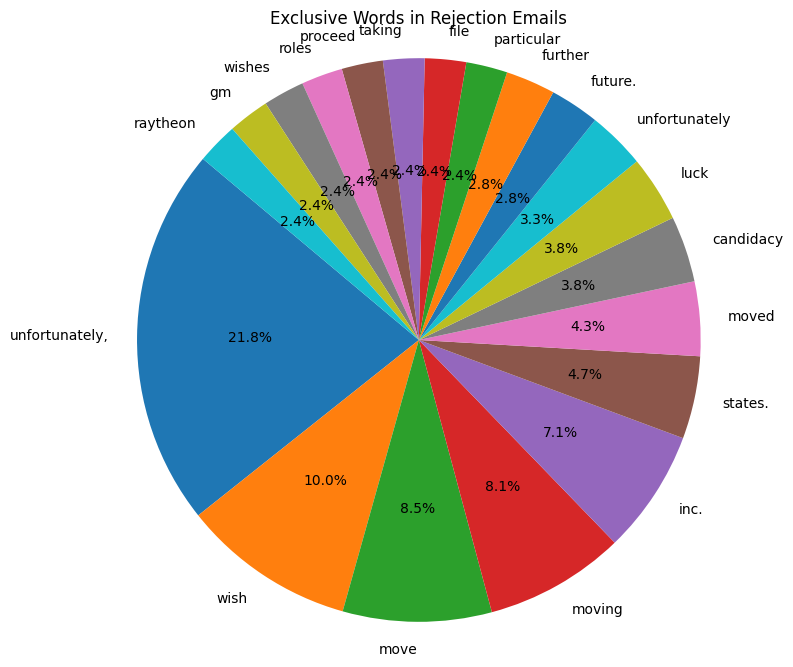

C:\Users\risha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


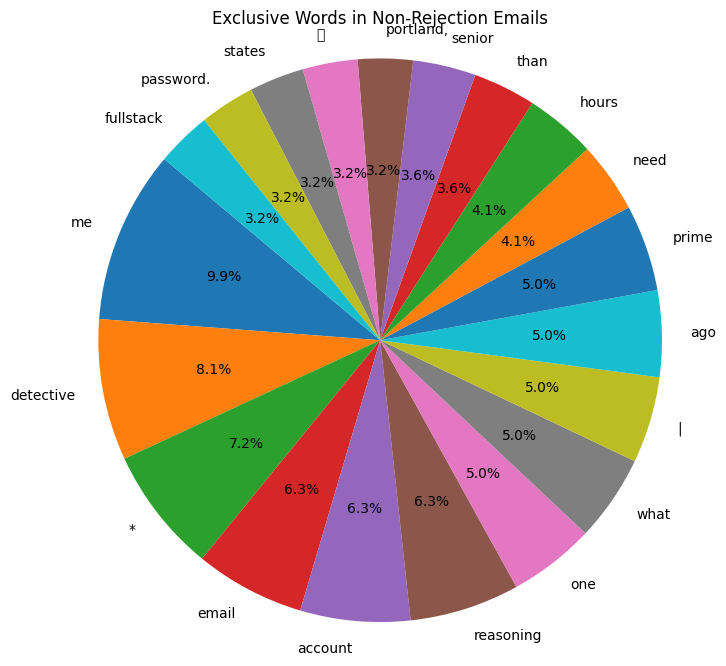

In [472]:
import matplotlib.pyplot as plt

def plot_pie_chart(freq_counter, title):
    labels = [item[0] for item in freq_counter]
    sizes = [item[1] for item in freq_counter]
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(title)
    plt.show()

plot_pie_chart(reject_exclusive_freq.most_common(20), 'Exclusive Words in Rejection Emails')
plot_pie_chart(not_reject_exclusive_freq.most_common(20), 'Exclusive Words in Non-Rejection Emails')


In [473]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

def perform_liu_hu_sentiment_analysis(email):
    scores = sid.polarity_scores(email)
    if scores['compound'] >= 0.05:
        return "Positive Sentiment"
    elif scores['compound'] <= -0.05:
        return "Negative Sentiment"
    else:
        return "Neutral Sentiment"

df['Liu_Hu_Sentiment'] = df['Email'].apply(perform_liu_hu_sentiment_analysis)

print(df[['Email', 'Liu_Hu_Sentiment']])


                                                 Email    Liu_Hu_Sentiment
0    Thank you for applying to the Junior Software ...   Neutral Sentiment
1    Thank you for your interest in the Train To Hi...  Positive Sentiment
2    eth,   Thank you for your interest in Exyn and...  Positive Sentiment
3    Thank you for your interest in the Software En...  Positive Sentiment
4    Hi Seth,  Thank you for your interest in PathA...  Positive Sentiment
..                                                 ...                 ...
124   Starting March 17, 2021, eBay will no longer ...  Positive Sentiment
125  Hi Seth,  I want to make finding a great remot...  Positive Sentiment
126  Hello Seth,  I just wanted to take a second to...  Positive Sentiment
127  Your free YouMail plan includes 20 in-app tran...  Positive Sentiment
128   Support resources for developers at all level...  Positive Sentiment

[129 rows x 2 columns]


C:\Users\risha\AppData\Local\Temp\ipykernel_7008\2467285535.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Liu_Hu_Sentiment', y='Length', data=df, palette='pastel')


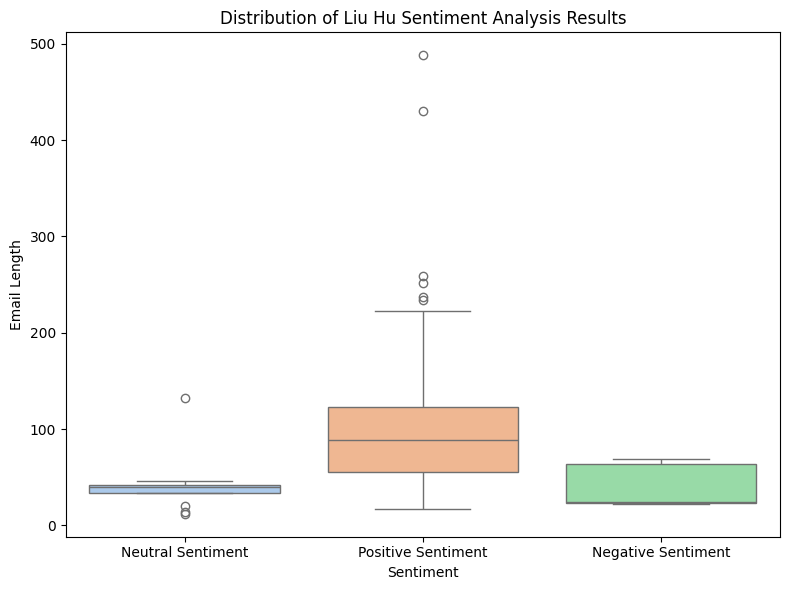

In [474]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='Liu_Hu_Sentiment', y='Length', data=df, palette='pastel')
plt.title('Distribution of Liu Hu Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Email Length')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



In [475]:
from nltk.stem import WordNetLemmatizer, PorterStemmer, LancasterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

stop_words = set(stopwords.words('english'))

lemmatizer = WordNetLemmatizer()
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()

reject_emails = df[df['Status'] == 'reject']['Email']
non_reject_emails = df[df['Status'] != 'reject']['Email']

reject_lemma_freq = Counter()
non_reject_lemma_freq = Counter()
reject_porter_stem_freq = Counter()
non_reject_porter_stem_freq = Counter()
reject_lancaster_stem_freq = Counter()
non_reject_lancaster_stem_freq = Counter()

for email in reject_emails:
    words = word_tokenize(email.lower())
    words = [word for word in words if word.isalnum() and word not in stop_words]
    lemmas = [lemmatizer.lemmatize(word) for word in words]
    porter_stems = [porter_stemmer.stem(word) for word in words]
    lancaster_stems = [lancaster_stemmer.stem(word) for word in words]
    reject_lemma_freq.update(lemmas)
    reject_porter_stem_freq.update(porter_stems)
    reject_lancaster_stem_freq.update(lancaster_stems)

for email in non_reject_emails:
    words = word_tokenize(email.lower())
    words = [word for word in words if word.isalnum() and word not in stop_words]
    lemmas = [lemmatizer.lemmatize(word) for word in words]
    porter_stems = [porter_stemmer.stem(word) for word in words]
    lancaster_stems = [lancaster_stemmer.stem(word) for word in words]
    non_reject_lemma_freq.update(lemmas)
    non_reject_porter_stem_freq.update(porter_stems)
    non_reject_lancaster_stem_freq.update(lancaster_stems)

print("Most common lemmas for reject emails:")
print(reject_lemma_freq.most_common(30))

print("\nMost common lemmas for non-reject emails:")
print(non_reject_lemma_freq.most_common(30))

print("\nMost common Porter stems for reject emails:")
print(reject_porter_stem_freq.most_common(30))

print("\nMost common Porter stems for non-reject emails:")
print(non_reject_porter_stem_freq.most_common(30))

print("\nMost common Lancaster stems for reject emails:")
print(reject_lancaster_stem_freq.most_common(30))

print("\nMost common Lancaster stems for non-reject emails:")
print(non_reject_lancaster_stem_freq.most_common(30))


Most common lemmas for reject emails:
[('interest', 81), ('thank', 68), ('position', 68), ('time', 56), ('unfortunately', 53), ('software', 47), ('application', 41), ('forward', 34), ('opportunity', 32), ('engineer', 31), ('best', 31), ('team', 29), ('job', 29), ('career', 29), ('appreciate', 27), ('wish', 27), ('candidate', 26), ('role', 26), ('regard', 23), ('developer', 22), ('search', 22), ('future', 22), ('decided', 21), ('please', 19), ('new', 19), ('move', 18), ('applying', 17), ('moving', 17), ('opening', 17), ('hiring', 16)]

Most common lemmas for non-reject emails:
[('software', 44), ('job', 35), ('application', 32), ('engineer', 32), ('please', 31), ('resume', 30), ('team', 26), ('thank', 26), ('u', 23), ('experience', 23), ('get', 22), ('position', 21), ('account', 20), ('email', 19), ('new', 19), ('developer', 18), ('detective', 18), ('development', 15), ('hour', 15), ('seth', 14), ('know', 14), ('see', 14), ('reasoning', 14), ('need', 13), ('interest', 13), ('review', 13

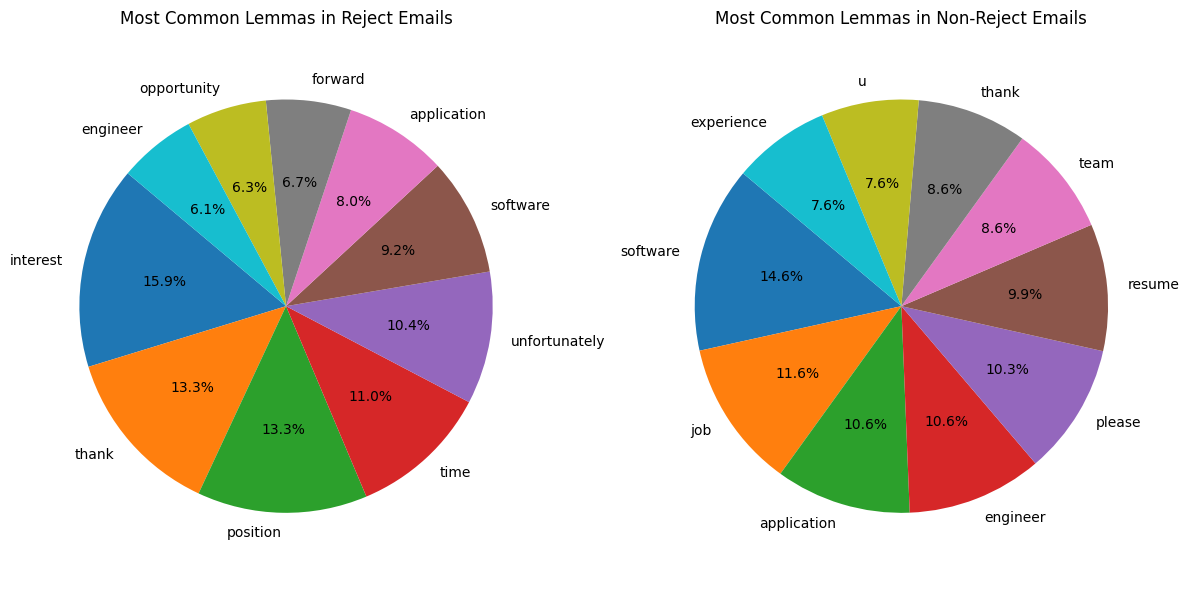

In [476]:
import matplotlib.pyplot as plt

def plot_pie_chart(ax, data, title):
    labels = [item[0] for item in data]
    sizes = [item[1] for item in data]
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    ax.axis('equal')
    ax.set_title(title)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

plot_pie_chart(axes[0], reject_lemma_freq.most_common(10), 'Most Common Lemmas in Reject Emails')

plot_pie_chart(axes[1], non_reject_lemma_freq.most_common(10), 'Most Common Lemmas in Non-Reject Emails')

plt.tight_layout()
plt.show()


In [477]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec

stop_words = set(stopwords.words('english'))

reject_emails = df[df['Status'] == 'reject']['Email']
non_reject_emails = df[df['Status'] == 'not_reject']['Email']

reject_tokens = []
for email in reject_emails:
    words = word_tokenize(email.lower())
    words = [word for word in words if word.isalnum() and word not in stop_words]
    reject_tokens.append(words)

non_reject_tokens = []
for email in non_reject_emails:
    words = word_tokenize(email.lower())
    words = [word for word in words if word.isalnum() and word not in stop_words]
    non_reject_tokens.append(words)

reject_model = Word2Vec(sentences=reject_tokens, vector_size=150, window=10, min_count=2, workers=4)
non_reject_model = Word2Vec(sentences=non_reject_tokens, vector_size=150, window=10, min_count=2, workers=4)

print("Top 20 most similar tokens in reject emails to 'developer':")
for token, similarity in reject_model.wv.most_similar('developer', topn=20):
    print(token, "-", similarity)
print()



Top 20 most similar tokens in reject emails to 'developer':
job - 0.6342087984085083
interest - 0.6225330829620361
application - 0.6065803170204163
unfortunately - 0.5998228192329407
position - 0.5924768447875977
forward - 0.5825234651565552
openings - 0.579850435256958
match - 0.5772836804389954
please - 0.5706102252006531
time - 0.5689783692359924
website - 0.5663118362426758
applications - 0.5604331493377686
decided - 0.5597655773162842
positions - 0.5484640002250671
know - 0.547116756439209
candidates - 0.5459237098693848
apply - 0.5448218584060669
roles - 0.5410215258598328
search - 0.5394123792648315
software - 0.5380761027336121



In [478]:
print("Top 20 most similar tokens in non-reject emails to 'developer':")
for token, similarity in non_reject_model.wv.most_similar('developer', topn=20):
    print(token, "-", similarity)

Top 20 most similar tokens in non-reject emails to 'developer':
firebase - 0.29363128542900085
reviewed - 0.2810145914554596
prints - 0.27943143248558044
w2 - 0.2784360945224762
institute - 0.2692500948905945
core - 0.2653864324092865
days - 0.260361909866333
detective - 0.2518335282802582
lot - 0.25076815485954285
job - 0.249113529920578
time - 0.248935267329216
date - 0.24856512248516083
match - 0.24171268939971924
name - 0.2377973347902298
also - 0.23652160167694092
receiving - 0.2360796183347702
provide - 0.2342650294303894
applying - 0.23131446540355682
feel - 0.2295612096786499
work - 0.226958766579628


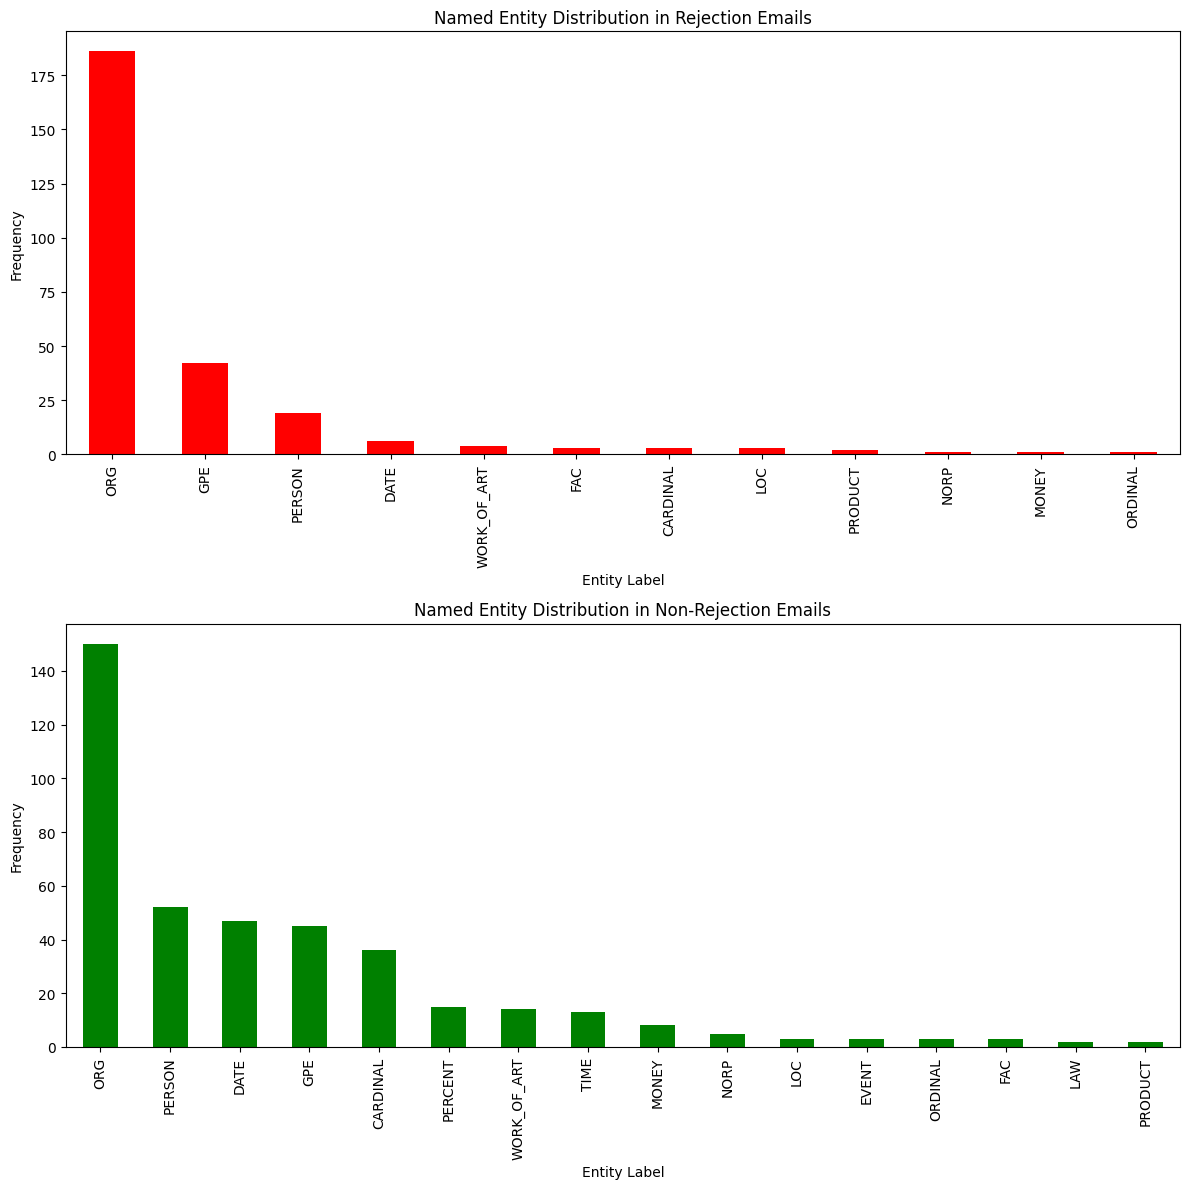

In [479]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt

nlp = spacy.load("en_core_web_sm")

rejection_emails = df[df["Status"]=="reject"]["Email"]
ner_reject_emails = rejection_emails.apply(lambda x: [(ent.text, ent.label_) for ent in nlp(x).ents])

non_rejection_emails = df[df["Status"]=="not_reject"]["Email"]
ner_non_reject_emails = non_rejection_emails.apply(lambda x: [(ent.text, ent.label_) for ent in nlp(x).ents])

flat_ner_reject = [item for sublist in ner_reject_emails for item in sublist]
flat_ner_non_reject = [item for sublist in ner_non_reject_emails for item in sublist]

ner_reject_df = pd.DataFrame(flat_ner_reject, columns=["Entity", "Label"])
ner_non_reject_df = pd.DataFrame(flat_ner_non_reject, columns=["Entity", "Label"])

fig, axes = plt.subplots(2, 1, figsize=(12, 12))

ner_reject_df["Label"].value_counts().plot(kind="bar", color="red", ax=axes[0])
axes[0].set_title("Named Entity Distribution in Rejection Emails")
axes[0].set_xlabel("Entity Label")
axes[0].set_ylabel("Frequency")

ner_non_reject_df["Label"].value_counts().plot(kind="bar", color="green", ax=axes[1])
axes[1].set_title("Named Entity Distribution in Non-Rejection Emails")
axes[1].set_xlabel("Entity Label")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()
